# CLUSTER-DATA-SPLIT

### Reference
This tool implements the methods described in the paper following paper.

> Hanna Wecker, Annemarie Friedrich, and Heike Adel.
*ClusterDataSplit: Evaluation Challenging Data Splits for Model Performance Evaluation*. In Proceedings of Eval4NLP 2020.

If you use this tool, please cite the above paper.


### LICENSE info
ClusterDataSplit is open-sourced under the AGPL-3.0 license. See the LICENSE file at the top level of this project for details. For a list of other open source components included in ClusterDataSplit, see the file 3rd-party-licenses.txt at the top level of this project.

# (1) Data Analysis
This notebook explores general text data characteristics such as sentence length, most frequent unigrams, and label distribution. It is intended to provide a first overview of your data and its properties.

To ensure that all packages can be loaded, run this notebook in the environment specified by the file `clusterdatasplit.yml`.

In [1]:
import sklearn
print(sklearn.__version__)
version_nr = int(sklearn.__version__.split(".")[1])
if version_nr > 23:
    print("Careful - ClusterDataSplit only works with sklearn <= version 0.23 !!")

0.23.1


In [1]:
# import packages
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.display import display, Image
import random
from utils import *
import os

In [ ]:
# Options for Figures
sns.set(style = 'whitegrid', font = 'sans-serif')
sns.set_palette("hls", 5)
matplotlib.rcParams['figure.figsize'] = (10, 7.5)

## Inputs

Per default, this notebook expects a .tsv-file with the columns `labels` and `text_input_data`. The first line of the tsv file should contain this header. Take a look at `data/toy_data/input_data.tsv` for an example.

The text input data should be preprocessed, in detail, stopwords, punctuation and non-alphabetic characters should be removed and text should be lemmatized. The text input data is handed over to the notebook in its tokenized form, separated by whitespace. If you haven't already done this for your data, you can use the utilities provided in the Notebook (0) Preprocessing for doing so.

### Loading Input Data
Here, you can load your data. If you want to change anything about the data input formats mentioned above, you need to change it here.

In [ ]:
# load from csv-file
input_data = pd.read_csv(os.path.join(os.getcwd(), "data/toy_data/input_data.tsv"), delimiter = "\t")
labels = np.array([input_data['labels']])
text_data = list(input_data['text_input_data'])

In [ ]:
input_data[:10] # show first 10 lines of toy dataset

In [ ]:
# assert that length of list matches length of ids
if not len(text_data) == len(labels[0]):
    print('Check inputs! Length of Text data and length of IDs do not match!')

In [ ]:
number_ids, length_text, unique_labels, label_text_length, idx2label, label2idx = generate_overview_stats(text_data, labels)

## Text Data Analysis

Now, this notebook will give you an overview of some general statistics regarding your text data. We will explore length and label distribution and cross-statistics combining the two variables are explored.

### Text Samples

To look at some random text sequences in your data, just execute the following cell once or as many times as you like.


In [ ]:
(random.sample(text_data, 10))

### Dataset Size
Print the number of instances in the dataset:

In [ ]:
number_ids

## Text Length Statistics
### Summary Statistics

The summary statistics regarding text length contain the following items: 
- `count`: number of examples
- `mean`: mean sentence length
- `std`: standard deviation, i.e. the average difference in text length of a given example to the mean text length
- `min`: minimum text length of all examples
- `25%`: 25%-Quantil --> 25% of examples have text lengths below this value, 75% have text lengths above
- `50%`: 50%-Quantil (also called median) --> 50% of examples have a text length below this value, 50% above (i.e., if you would line up all examples sorted by text length, this is the text length of the example that would be right in the middle of the line. If the distribution regarding text length is symmetrical, median and mean are the same. If the median is not the same as the mean, this indicates the text length distribution is scewed)
- `75%`: 75%-Quantil --> interpretation see 25%
- `max`: maximum text length of all examples

In [10]:
pd.DataFrame({'Text Length': length_text}).describe().round(decimals = 2)

,Text Length
count,30.00
mean,3.83
std,1.64
min,1.00
25%,3.00
50%,4.00
75%,4.75
max,8.00


### Histogram

The histogram delivers visual information about the text length distribution in your dataset. It plots the number of tokens in your text examples against their number of occurence. The histogram can help you identify if there are certain text lengths which occur more frequently in your data than others. For example, you could find out that there are more longer sentences in your dataset than shorter sentences by looking at the histogram.

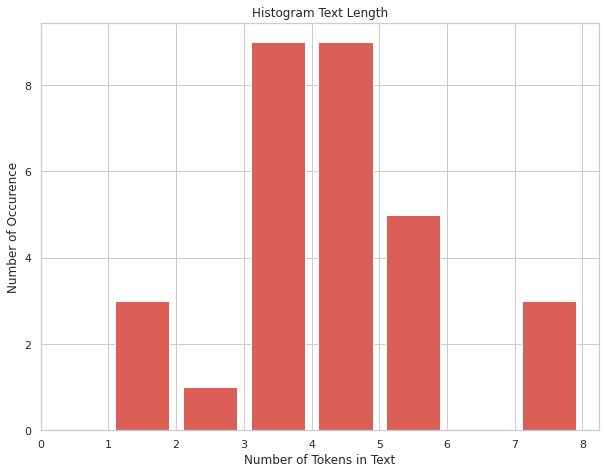

In [11]:
plot_sentence_length(length_text)

## Label Distribution

Labels are categorical and thus qualitative variables. This means that they do not have an intrinsic order (ex. label "orange" is not more or less than label "blue"). Even though labels are sometimes encoded by numbers, they should never be treated like quantitative variables (i.e., variables encoding a measurement). For example, text length is a discrete quantitative variable. It is discrete because the different numbers the variable can take on are only integers and thus countable. Quantitative Variables can be summarized by summary statistics like the one presented above. This does not make sense for qualitative variables (what should the mean of 3 blue flowers, two red ones and 1 purple one be?). Thus, the analysis of qualitative variables needs a bit more caution. Here, we explore the relative amount of examples which carry each label.

In [12]:
print_label_distribution(unique_labels, label2idx)

Label Negative   Negative: 50.00%
Label Positive   Positive: 50.00%


['Negative' 'Positive']


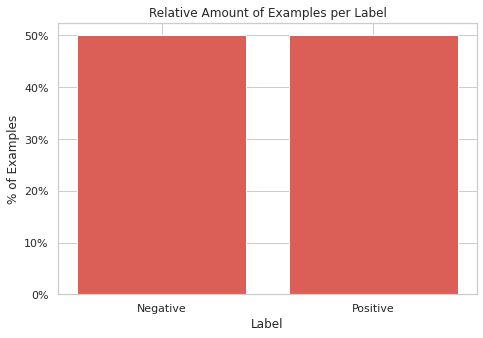

In [13]:
plot_label_distribution(unique_labels, label2idx)

### Token Frequency

Studying the token frequency in your text can give you a first hint which topics are prevalent in your data. We consider the 20 most frequent tokens in our example. If you would like to change the number of tokens displayed, change the second argument (rank) to the function "generate_tokens_and_frequencies".

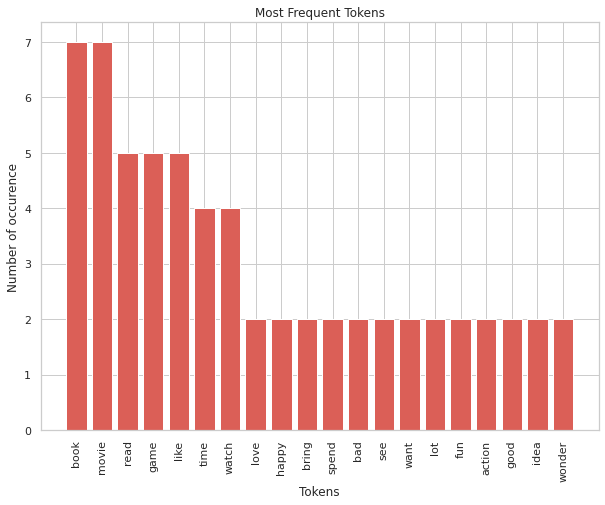

In [14]:
tokens, frequencies, full_text_string = generate_tokens_and_frequencies(text_data, rank = 20)
plot_frequent_tokens(tokens, frequencies)

### Frequent Tokens Wordcloud
As we have collected frequencies, let's create a nice image showing the relative importance of the most frequent terms in your dataset.

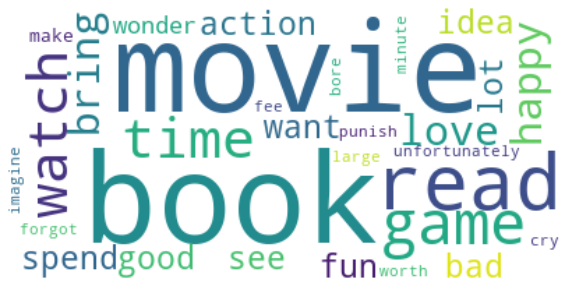

In [15]:
generate_wordcloud(full_text_string, number_of_words = 30)

### Token Frequency w.r.t. Label Statistics

Now, we study the token frequency by label. This allows us to identify if some tokens are more frequent than others with distict labels and if the examples with the different labels might focus on different topics.

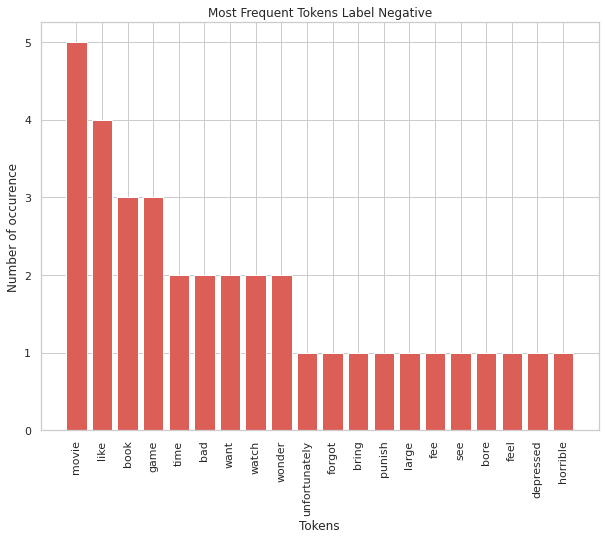

Word cloud for label Negative


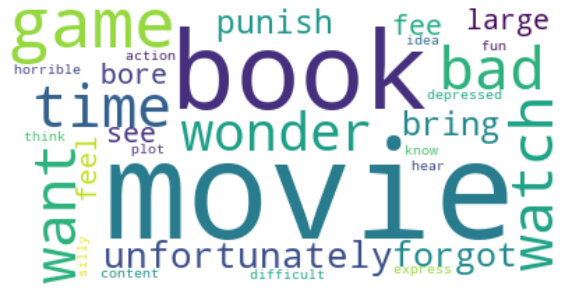

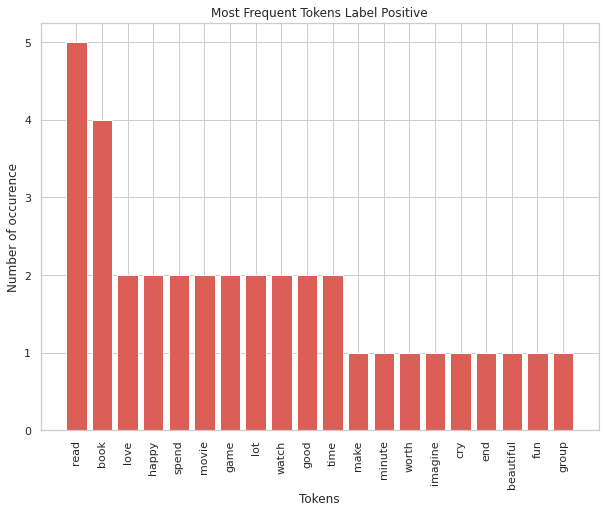

Word cloud for label Positive


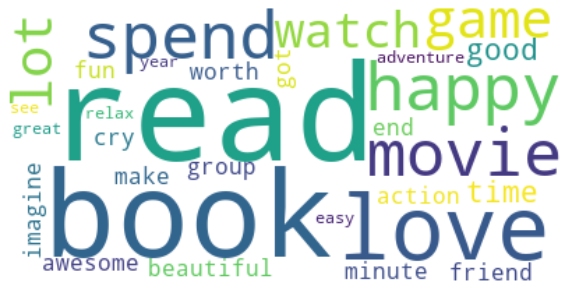

In [16]:
plot_tokens_by_label(text_data, unique_labels, label2idx, labels, rank=20)

### Text Length vs. Label

In what follows, cross-statistics relating to text length and label distribution will be presented. This means that we will study both variables at the same time.

We next will visualize the distribution of token text lengths per label. A boxplot is suited for visualizing quantitative data in relation to a qualitative indicator. We plot the labels on the x-axis and the text lengths on the y-axis. The boxplot can be interpreted as follows. The box pictures the 25% and the 75% Quantile of the text length data (for quantile explanation, see the summary statistic above). The line through the box visualizes the median. The whiskers attached to the box visualize the minimum and maximum values lying outside the box, as long as they are not farther away from the end of the box than 1.5 times the box' length (we call the box length the inter-quartile range). Points that are farther away from the end of the boxes are called outliers and are depicted by separate points in the boxplot.

In the boxplot we can see if the distributions of text length differ structurally between the labels. For example, one would be able to see in a boxplot if the medians of the distributions per label are very far apart.

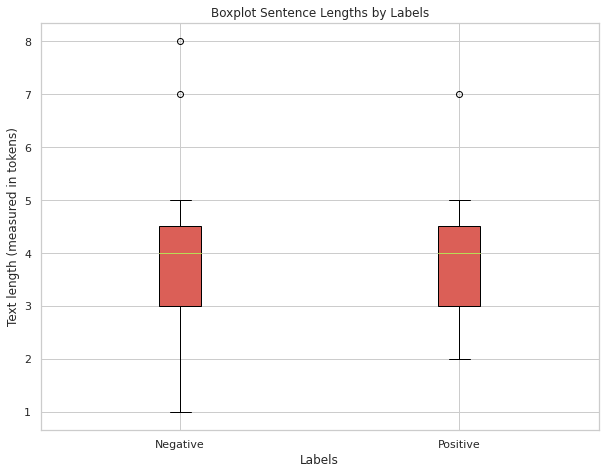

In [18]:
plot_text_length_by_labels(unique_labels, label_text_length, label2idx)

In our toy data, the data between the 25% and 75% percentiles are very similar, but the minimum value (2) is larger for label 1 than for label 0, where it is 1.